In [30]:
import json
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from dredFISH.Analysis.__init__plots import *
from dredFISH.Analysis import basicu 
from dredFISH.Analysis import powerplots
from dredFISH.Design.model import *
from dredFISH.Design.allen_data_iterators import DataIterCached

In [27]:
res_dir = '/bigstore/GeneralStorage/fangming/projects/dredfish/data_dump'
dat_dir = '/bigstore/GeneralStorage/fangming/projects/dredfish/data'
fig_dir = '/bigstore/GeneralStorage/fangming/projects/dredfish/figures'

In [3]:
f = '/bigstore/binfo/mouse/Brain/DRedFISH/Allen_V3_Reference' + '/10X/genes.npy' 
tenx_genes = np.load(f)
f = '/bigstore/binfo/mouse/Brain/DRedFISH/Allen_V3_Reference' + '/SmartSeq/genes.npy' 
smrt_genes = np.load(f)

np.all(tenx_genes == smrt_genes)

genes = tenx_genes
genes.shape

(10861,)

In [4]:
# f = '/bigstore/binfo/mouse/Brain/DRedFISH/Allen_V3_Reference' + '/10X/probe_constraints.npy' 
# prbe_cnstrnts = np.load(f)
# prbe_cnstrnts.shape
# prbe_cnstrnts

# outputs
- embmat - a (ncell, nbit (24)) matrix
- model - a pytorch format
- results -- some summary statistics

- meta (what are these parameters?)
    - max-half_nrml-90000.0-1.27E+05-24-0-2.60E-09-0.01-1.0
    - max-half_nrml-90000.0-1.32E+05-24-0-3.40E-09-0.01-1.0
    
# input
- allen_data_iterator
    - original: `/bigstore/binfo/mouse/Brain/DRedFISH/Allen_V3_Reference`
    - cached: `/bigstore/binfo/mouse/Brain/DRedFISH/Allen_V3_Reference/cache/_2`

In [5]:
pm = sns.color_palette('husl', n_colors=24)
pm

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9699521567340649, 0.4569882390259858, 0.36385324448493633),
 (0.903599057664843, 0.511987276335809, 0.19588350060161624),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.6666319352625271, 0.6197366714155128, 0.19396267878823373),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.49382662140640926, 0.6649121332643736, 0.19300804648700284),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.20312757197899856, 0.6881249249803418, 0.5177618167447304),
 (0.20703735729643508, 0.6824290013722435, 0.5885318893529169),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.21387918628643265, 0.6720135434784761, 0.693961140878689),
 (0.21786710662428366, 0.6656671601322255, 0.7482809385065813),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.4768773964929644, 0.5974418160509446, 0.9584992622400258),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.774710828527837, 0.49133823414365724, 0.9580114121137316),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491),
 (0.9633321742064956, 0.40643825645731757, 0.7592537599568671),
 (0.9656056642634557, 0.4245907603266889, 0.6579786740552919)]

# the embmat

In [6]:
## NN pmat
f = os.path.join(res_dir, 
                 'results_nn_test/embmat=max-half_nrml-90000.0-1.27E+05-24-0-2.60E-09-0.01-1.0.json')

with open(f, 'r') as fh:
    embmat = np.array(json.load(fh))
    print(embmat.shape)
    
pmat = pd.DataFrame(embmat, index=genes)

## NN pmat
f = os.path.join(dat_dir, 'dpnmf.csv')
pmat0 = pd.read_csv(f, index_col=0)
pmat0

(10861, 24)


,RS0109_cy5,RS0175_cy5,RS0237_cy5,RS0307_cy5,RS0332_cy5,RS0384_atto565,RS0406_atto565,RS0451_atto565,RS0468_atto565,RS0548_atto565,...,RS643.0_alexa488,RS740.0_alexa488,RS810.0_alexa488,RSN9927.0_cy5,RSN2336.0_cy5,RSN1807.0_cy5,RSN4287.0_atto565,RSN1252.0_atto565,RSN9535.0_atto565,RS0095_cy5
Gm1992,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sox17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,20,0,0,0,0,0
Mrpl15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tcea1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Atp6v1h,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt-Nd6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vamp7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tmlhe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC149090.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
genes_shared = np.intersect1d(pmat.index.values, pmat0.index.values)
genes_shared.shape

(5467,)

# check encoding matrix

In [8]:
for i, col in enumerate(pmat):
    _x = pmat[col]
    _x = _x[_x>0]
    print(i, len(_x), np.min(_x), np.max(_x), np.sum(_x))
    

0 249 1.0 179.0 3624.0
1 291 1.0 135.0 4203.0
2 317 1.0 86.0 3872.0
3 267 1.0 86.0 3585.0
4 321 1.0 124.0 3849.0
5 209 1.0 230.0 3240.0
6 239 1.0 108.0 2511.0
7 270 1.0 135.0 4031.0
8 232 1.0 105.0 3779.0
9 346 1.0 97.0 4291.0
10 335 1.0 162.0 3958.0
11 280 1.0 139.0 3635.0
12 308 1.0 92.0 3683.0
13 311 1.0 215.0 3454.0
14 265 1.0 119.0 3247.0
15 319 1.0 118.0 4424.0
16 234 1.0 140.0 3118.0
17 238 1.0 123.0 3510.0
18 280 1.0 226.0 3666.0
19 255 1.0 156.0 3265.0
20 354 1.0 121.0 4041.0
21 305 1.0 138.0 4567.0
22 315 1.0 139.0 4180.0
23 283 1.0 130.0 3757.0


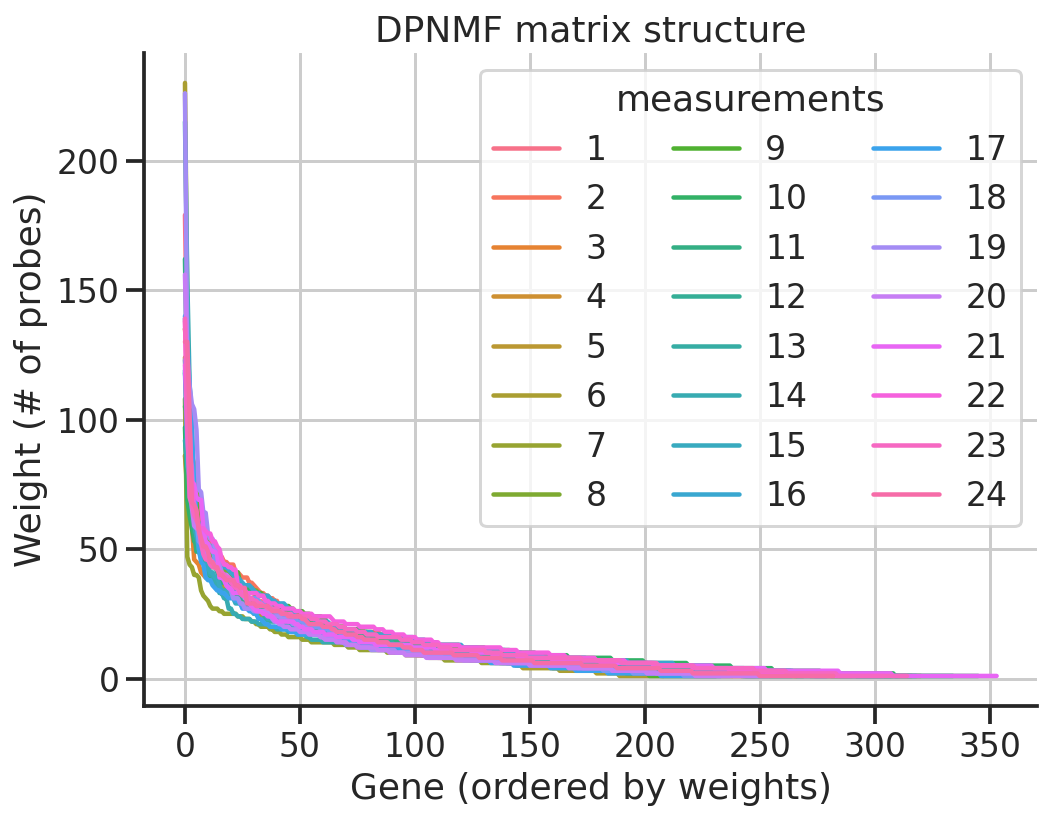

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
for i, col in enumerate(pmat):
    _x = pmat[col]
    _x = np.flip(np.sort(_x[_x>0])) #[:,:,-1]
    ax.plot(_x, color=pm[i], label=f'{i+1}')
ax.set_xlabel('Gene (ordered by weights)')
ax.set_ylabel('Weight (# of probes)')
sns.despine(ax=ax)
ax.set_title('DPNMF matrix structure')
ax.legend(ncol=3, title='measurements')

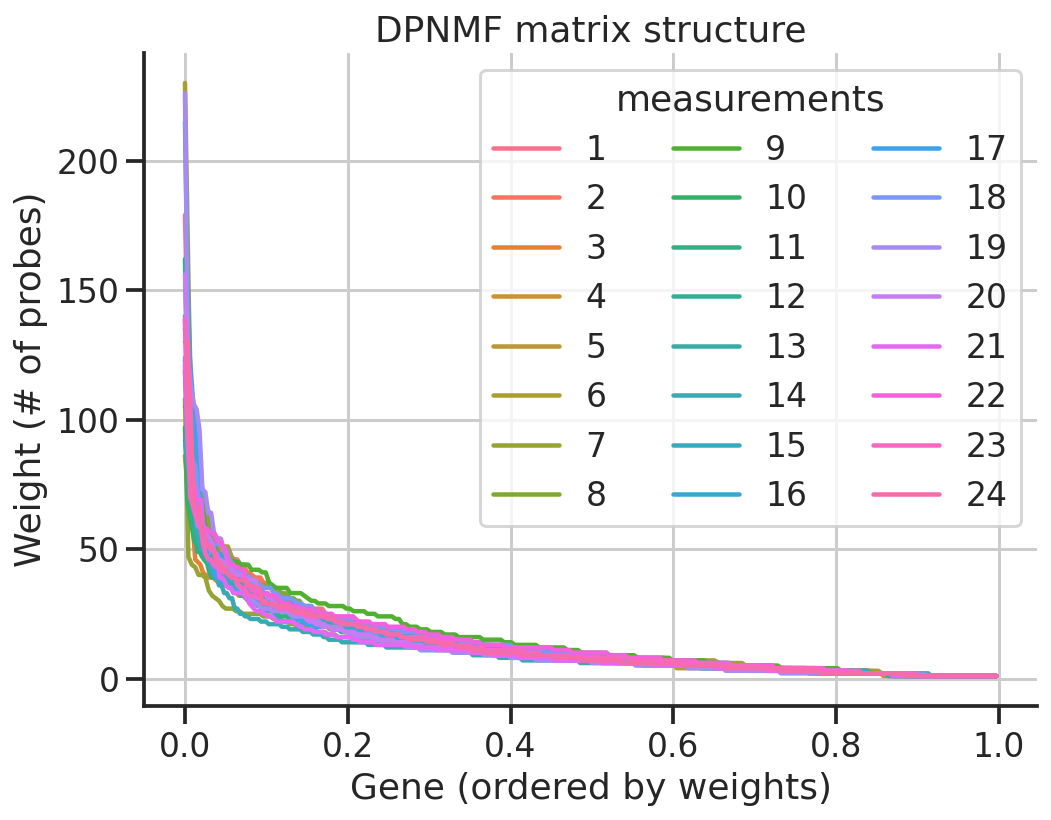

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
for i, col in enumerate(pmat):
    _x = pmat[col]
    _x = np.flip(np.sort(_x[_x>0])) #[:,:,-1]
    # _x = np.log10(_x+1)
    ax.plot(np.arange(len(_x))/len(_x), _x, color=pm[i], label=f'{i+1}')
ax.set_xlabel('Gene (ordered by weights)')
ax.set_ylabel('Weight (# of probes)')
sns.despine(ax=ax)
ax.set_title('DPNMF matrix structure')
ax.legend(ncol=3, title='measurements')

In [11]:
(pmat.sum(axis=1) == 0).sum(), (pmat.sum(axis=1) > 0).sum(), len(pmat)

(8009, 2852, 10861)

In [12]:
nzero_prbe_cond = pmat.sum(axis=1) > 0
pospmat = pmat[nzero_prbe_cond]

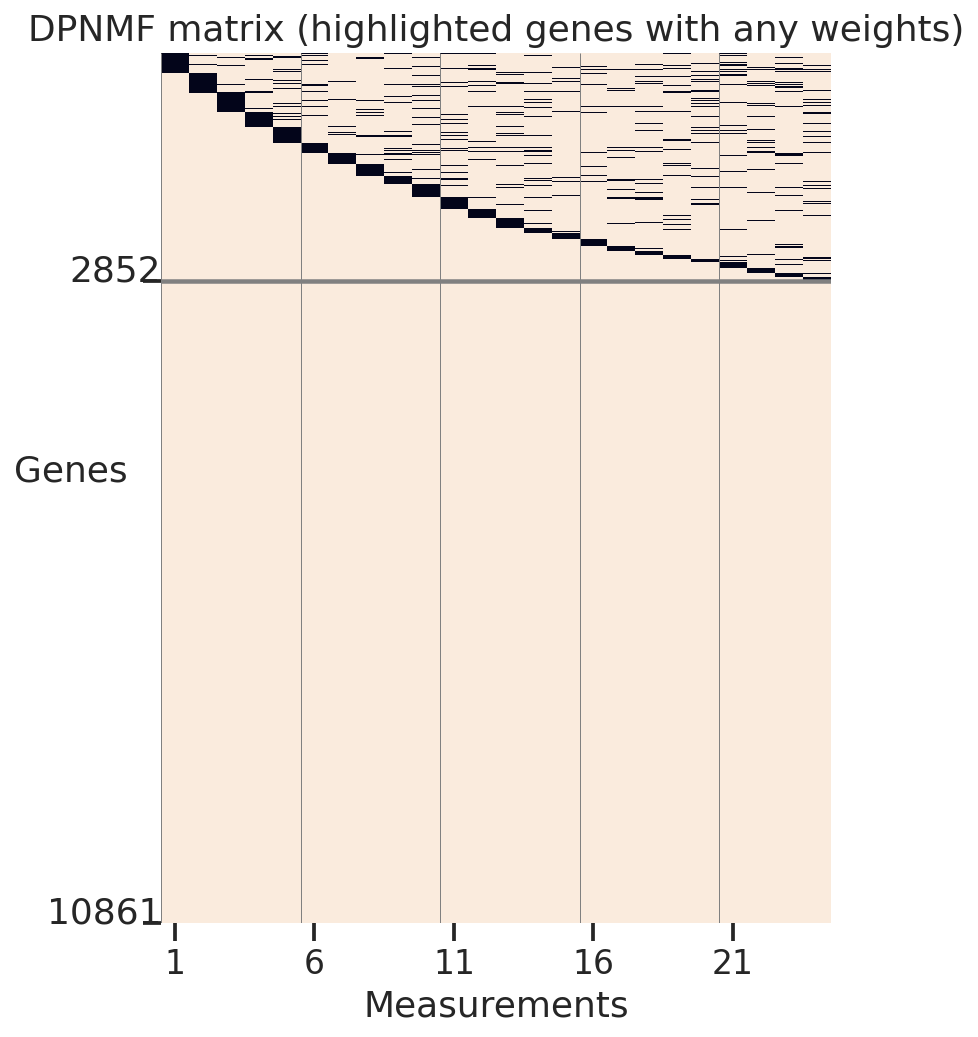

In [13]:

with sns.axes_style('ticks'):
    # zero count does not matter
    bpmat = (pospmat > 0).astype(int)

    _mat, _row, _col = basicu.diag_matrix_rows(bpmat.values)
    _zeromat = pmat[pmat.sum(axis=1) == 0]
    nmat = len(_mat)
    nzeromat = len(_zeromat)
    ntotal = nmat + nzeromat

    fig, ax = plt.subplots(figsize=(6,8))
    sns.heatmap(pd.DataFrame(np.vstack([_mat, _zeromat]), columns=(_col+1)),
                cbar=False,
                xticklabels=5, 
                cmap='rocket_r',
                ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
    ax.set_yticks([nmat, ntotal])
    ax.text(0, nmat, nmat, ha='right')
    ax.text(0, ntotal, ntotal, ha='right')
    
    ax.axhline(nmat, color='gray')
    ax.vlines(np.arange(0,24,5), 0, ntotal, color='gray', linewidth=0.5)
    ax.set_xlabel('Measurements')
    ax.set_ylabel(f'Genes', rotation=0, ha='right')
    ax.set_title('DPNMF matrix (highlighted genes with any weights)')
    plt.show()

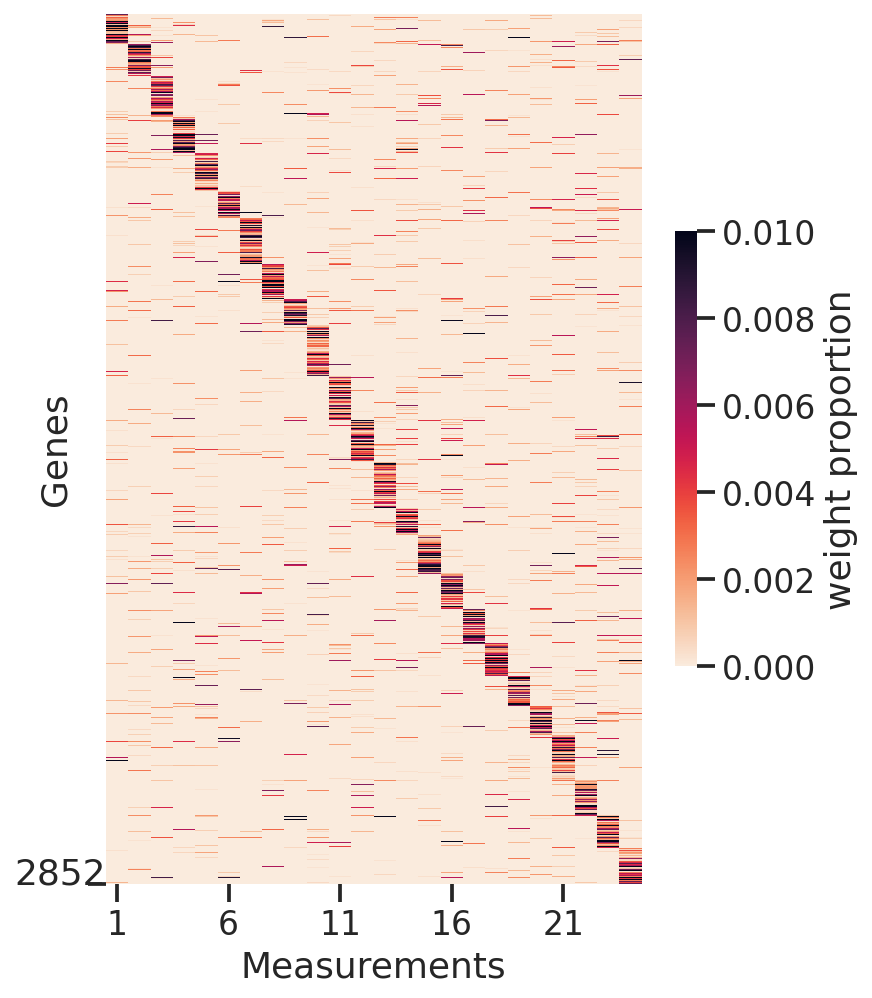

In [14]:
fpmat = pospmat.divide(pospmat.sum(axis=0), axis=1)
# fpmat = np.log(fpmat+1)
# normpmat = np.log10(pmat+1)
with sns.axes_style('ticks'):
    _mat, _row, _col = basicu.diag_matrix_rows(fpmat.values)
    nmat = len(_mat)

    fig, ax = plt.subplots(figsize=(6,8))
    sns.heatmap(pd.DataFrame(_mat, columns=_col+1), 
                xticklabels=5, 
                cmap='rocket_r',
                ax=ax, vmax=0.01, cbar_kws=dict(shrink=0.5, label='weight proportion')
               )
    ax.set_xlabel('Measurements')
    ax.set_ylabel('Genes')
    ax.set_yticks([nmat])
    ax.text(0, nmat, nmat, ha='right')
    plt.show()

# compare

saved the figure to: /bigstore/GeneralStorage/fangming/projects/dredfish/figures/encmat_compared_numgenes_2022-04-28.pdf


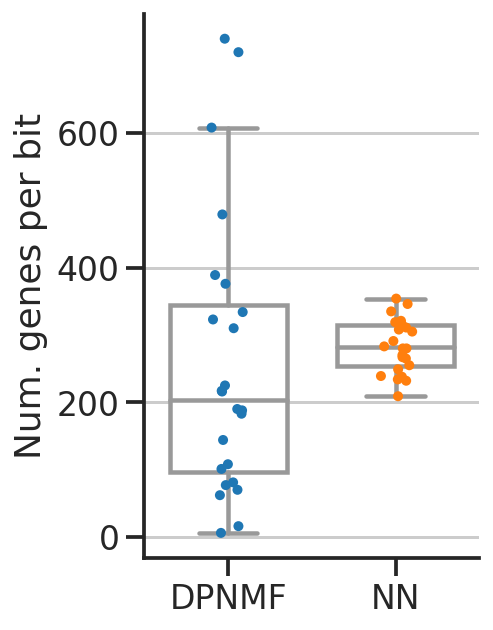

In [31]:
# number of genes
y0 = (pmat0 > 1e-4).sum()
y = (pmat > 1e-4).sum()
x = np.arange(24)
_df = pd.DataFrame(np.vstack([y0, y]).T, index=x, columns=['DPNMF', 'NN'])

fig, ax = plt.subplots(figsize=(3,5))
sns.boxplot(data=_df, width=0.7, color='white', fliersize=0, ax=ax)
sns.stripplot(data=_df, ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('Num. genes per bit')
powerplots.savefig_autodate(fig, os.path.join(fig_dir, "encmat_compared_numgenes.pdf"))
plt.show()

saved the figure to: /bigstore/GeneralStorage/fangming/projects/dredfish/figures/encmat_compared_numprobes_2022-04-28.pdf


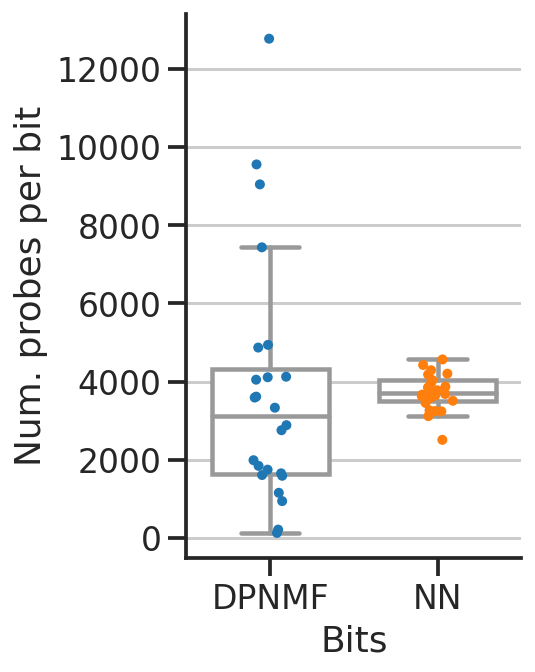

In [32]:
# number of probes
y0 = (pmat0).sum()
y = (pmat).sum()
x = np.arange(24)
_df = pd.DataFrame(np.vstack([y0, y]).T, index=x, columns=['DPNMF', 'NN'])

fig, ax = plt.subplots(figsize=(3,5))
sns.boxplot(data=_df, width=0.7, color='white', fliersize=0, ax=ax)
sns.stripplot(data=_df, ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('Num. probes per bit')
ax.set_xlabel('Bits')
powerplots.savefig_autodate(fig, os.path.join(fig_dir, "encmat_compared_numprobes.pdf"))
plt.show()

In [33]:
# contribution to bits 
nzero_prbe_cond = pmat.sum(axis=1) > 0
pospmat = pmat[nzero_prbe_cond]
fpmat = pospmat.divide(pospmat.sum(axis=0), axis=1)

nzero_prbe_cond = pmat0.sum(axis=1) > 0
pospmat = pmat0[nzero_prbe_cond]
fpmat0 = pospmat.divide(pospmat.sum(axis=0), axis=1)

saved the figure to: /bigstore/GeneralStorage/fangming/projects/dredfish/figures/encmat_compared_topgene_2022-04-28.pdf


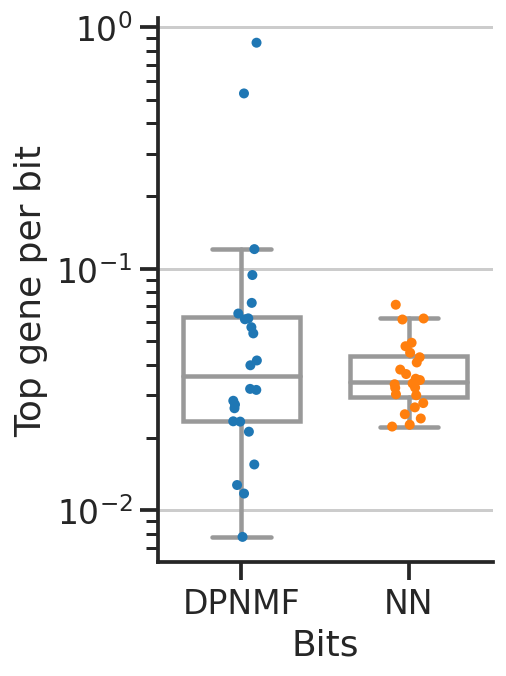

In [34]:
# number of probes
y0 = fpmat0.max()
y = fpmat.max()
x = np.arange(24)
_df = pd.DataFrame(np.vstack([y0, y]).T, index=x, columns=['DPNMF', 'NN'])

fig, ax = plt.subplots(figsize=(3,5))
sns.boxplot(data=_df, width=0.7, color='white', fliersize=0, ax=ax)
sns.stripplot(data=_df, ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('Top gene per bit')
ax.set_xlabel('Bits')
ax.set_yscale('log')
powerplots.savefig_autodate(fig, os.path.join(fig_dir, "encmat_compared_topgene.pdf"))
plt.show()

saved the figure to: /bigstore/GeneralStorage/fangming/projects/dredfish/figures/encmat_compared_bottomgene_2022-04-28.pdf


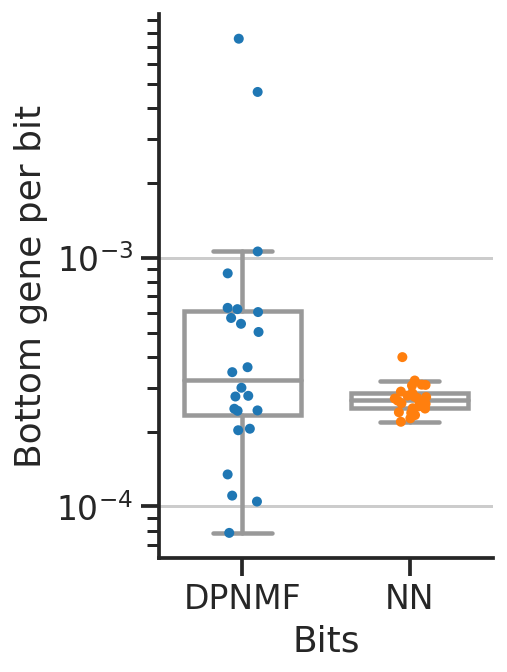

In [35]:
# number of probes
y0 = fpmat0.copy()
y0[y0<1e-7] = np.nan
minbits0 = y0.min(skipna=True)
maxbits0 = y0.max(skipna=True)

y = fpmat.copy()
y[y<1e-7] = np.nan
minbits = y.min(skipna=True)
maxbits = y.max(skipna=True)

x = np.arange(24)
_df = pd.DataFrame(np.vstack([minbits0, minbits]).T, index=x, columns=['DPNMF', 'NN'])

fig, ax = plt.subplots(figsize=(3,5))
sns.boxplot(data=_df, width=0.7, color='white', fliersize=0, ax=ax)
sns.stripplot(data=_df, ax=ax)
sns.despine(ax=ax)
ax.set_ylabel('Bottom gene per bit')
ax.set_xlabel('Bits')
ax.set_yscale('log')
powerplots.savefig_autodate(fig, os.path.join(fig_dir, "encmat_compared_bottomgene.pdf"))
plt.show()

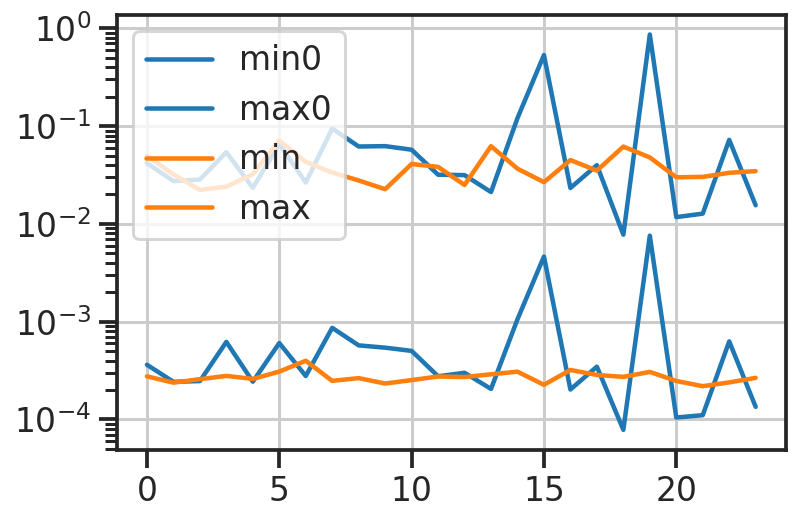

In [36]:
plt.plot(minbits0.values, color='C0', label='min0')
plt.plot(maxbits0.values, color='C0', label='max0')
plt.plot(minbits.values, color='C1', label='min')
plt.plot(maxbits.values, color='C1', label='max')
plt.legend()
plt.yscale('log')

saved the figure to: /bigstore/GeneralStorage/fangming/projects/dredfish/figures/encmat_DPNMF_2022-04-28.pdf


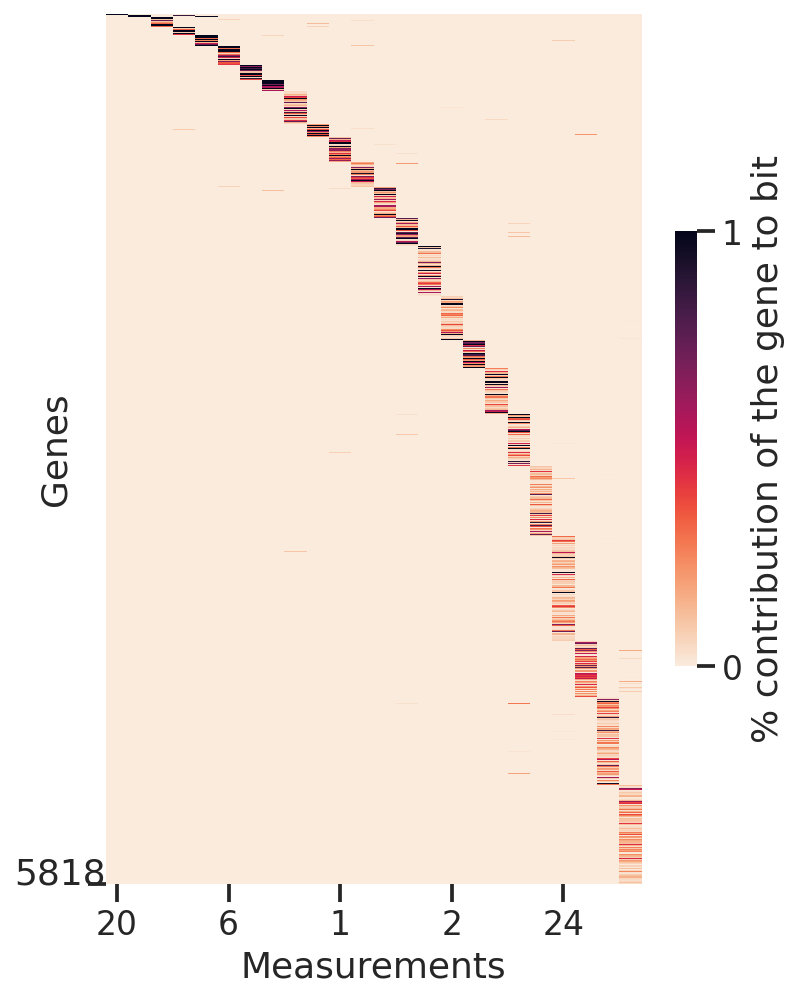

In [40]:
# fpmat = np.log(fpmat+1)
# normpmat = np.log10(pmat+1)
with sns.axes_style('ticks'):
    # _mat, _row, _col = basicu.diag_matrix_rows(fpmat.values)
    _mat, _row, _col = basicu.diag_matrix(fpmat0.values)
    nmat = len(_mat)

    fig, ax = plt.subplots(figsize=(6,8))
    sns.heatmap(pd.DataFrame(_mat*100, columns=_col+1), 
                xticklabels=5, 
                cmap='rocket_r',
                ax=ax, 
                vmax=1, 
                rasterized=True,
                cbar_kws=dict(shrink=0.5, label='% contribution of the gene to bit', ticks=[0, 1])
               )
    ax.set_xlabel('Measurements')
    ax.set_ylabel('Genes')
    ax.set_yticks([nmat])
    ax.text(0, nmat, nmat, ha='right')
    powerplots.savefig_autodate(fig, os.path.join(fig_dir, "encmat_DPNMF.pdf"))
    plt.show()

saved the figure to: /bigstore/GeneralStorage/fangming/projects/dredfish/figures/encmat_NN_2022-04-28.pdf


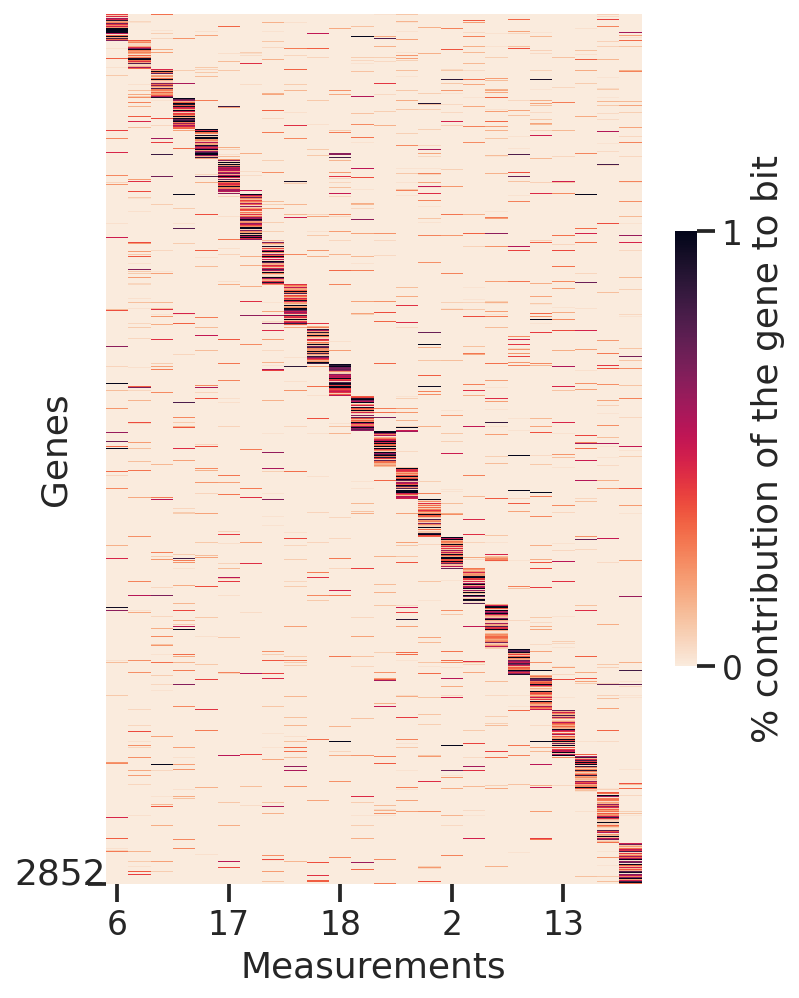

In [41]:
# fpmat = np.log(fpmat+1)
# normpmat = np.log10(pmat+1)
with sns.axes_style('ticks'):
    # _mat, _row, _col = basicu.diag_matrix_rows(fpmat.values)
    _mat, _row, _col = basicu.diag_matrix(fpmat.values)
    nmat = len(_mat)

    fig, ax = plt.subplots(figsize=(6,8))
    sns.heatmap(pd.DataFrame(_mat*100, columns=_col+1), 
                xticklabels=5, 
                cmap='rocket_r',
                ax=ax, 
                # vmax=0.01, cbar_kws=dict(shrink=0.5, label='weight proportion')
                vmax=1, 
                rasterized=True,
                cbar_kws=dict(shrink=0.5, label='% contribution of the gene to bit', ticks=[0, 1])
               )
    ax.set_xlabel('Measurements')
    ax.set_ylabel('Genes')
    ax.set_yticks([nmat])
    ax.text(0, nmat, nmat, ha='right')
    powerplots.savefig_autodate(fig, os.path.join(fig_dir, "encmat_NN.pdf"))
    
    plt.show()